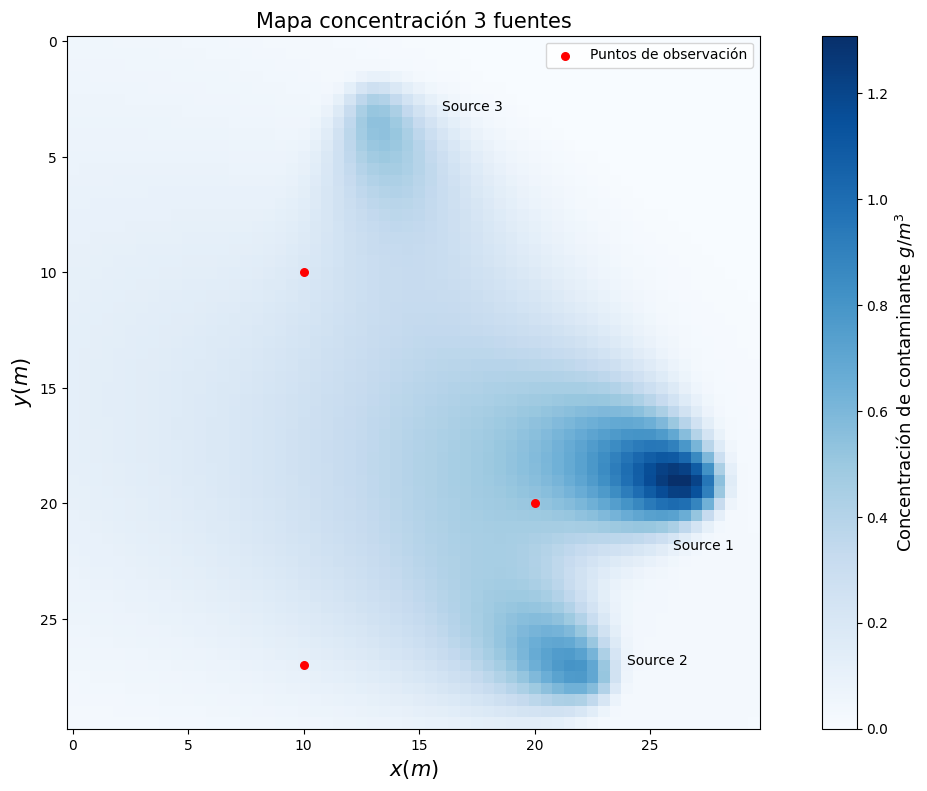

In [71]:
from gaussian_plume_model import GaussianModel
import matplotlib.pyplot as plt
import numpy as np
import multiprocessing as mp
from multiprocessing import Pool
import multiprocessing
import pandas as pd
import time

inicio = time.time()

RUNMODE = "plan"  # Generate the x-y view at z=0
STABILITY = {"condition": "constant", "value": 1}

WIND_1 = {"condition": "constant", "speed": 10.0, "direction": 75.0}
WIND_2 = {"condition": "constant", "speed": 10.0, "direction": 60.0}
WIND_3 = {"condition": "constant", "speed": 10.0, "direction": 200.0}

STACKS_1 = [(30, 20, 2)] 
STACKS_2 = [(25, 29, 2)]
STACKS_3 = [(12, 0, 2)]

flux_1 = [100]
flux_2 = [60]
flux_3 = [40]

xlims = (0.01, 30.0)
ylims = xlims
zlims = (0.0, 1.0)
tlims = (0.0, 1.0)
deltas = {"dx": 0.5, "dy": 0.5, "dz": 1, "dt": 1.0}

solver = GaussianModel(xlims, ylims, zlims, tlims, runmode="plan", **deltas)
C = solver.solve(flux_1, STACKS_1, STABILITY, WIND_1) + solver.solve(flux_2, STACKS_2, STABILITY, WIND_2) + solver.solve(flux_3, STACKS_3, STABILITY, WIND_3)

dx = deltas['dx']
dy = deltas['dy']

p1 = [10,10]
p2 = [10,27]
p3 = [20,20]

step_x = 5

plt.figure(figsize = (16,9))
im = plt.imshow(C[:,:,0] , cmap = 'Blues' , label = 'Fuentes de emisión')
levels = np.linspace(0, 1, 15)
# plt.contour(C[:,:,0], levels=levels,  cmap = 'PuBu')
plt.scatter(p1[0]/dx, p1[1]/dy, color = 'r', s =30, label = 'Puntos de observación')
plt.scatter(p2[0]/dx, p2[1]/dy, color = 'r', s =30)
plt.scatter(p3[0]/dx, p3[1]/dy, color = 'r', s =30)
cbar = plt.colorbar(im,cmap='Blues')
cbar.set_label('Concentración de contaminante $g / m^{3}$' , fontsize = 13)
plt.legend()
plt.title('Mapa concentración 3 fuentes', fontsize = 15)
plt.xlabel('$x (m)$',fontsize = 15)
plt.ylabel('$y (m)$',fontsize = 15)
plt.xticks(np.arange(0 , int((xlims[1]-xlims[0])/dx) , step_x/dx) , np.arange(int(xlims[0]),int(xlims[1]), step_x))
plt.yticks(np.arange(0 , int((xlims[1]-xlims[0])/dx) , step_x/dx) , np.arange(int(xlims[0]),int(xlims[1]), step_x))
plt.annotate('Source 1' , (26/dx, 22/dy))
plt.annotate('Source 2' , (24/dx, 27/dy))
plt.annotate('Source 3' , (16/dx, 3/dy))


plt.savefig('concentration_3sources.png')

In [36]:
ob1 = C[int(p1[1]/dx), int(p1[0]/dy), 0]
ob2 = C[int(p2[1]/dx), int(p2[0]/dy), 0]
ob3 = C[int(p3[1]/dx), int(p3[0]/dy), 0]

def gaus_3(q1, q2, q3):
        
    flux_1 = [q1]
    flux_2 = [q2]
    flux_3 = [q3]

    C = solver.solve(flux_1, STACKS_1, STABILITY, WIND_1) + solver.solve(flux_2, STACKS_2, STABILITY, WIND_2) + solver.solve(flux_3, STACKS_3, STABILITY, WIND_3)
        
    a = C[int(p1[1]/dx), int(p1[0]/dy), 0]
    b = ob1
    
    c = C[int(p2[1]/dx), int(p2[0]/dy), 0]
    d = ob2
    
    e = C[int(p3[1]/dx), int(p3[0]/dy), 0]
    f = ob3
    
    
    dif1 = (a-b)**2
    dif2 = (c-d)**2
    dif3 = (e-f)**2
    
    dif = dif1 + dif2 + dif3
    
    return q1, q2, q3, dif

inicio = time.time()

N = 10_000

q1 = []
q2 = []
q3 = []

for j in range(200):
    print(f'Comienza la simulación {j}')

    qs_1 = np.random.normal(75, 20, N)
    qs_2 = np.random.normal(75, 20, N)
    qs_3 = np.random.normal(75, 20, N)


    if __name__ == '__main__':
        num_processes = multiprocessing.cpu_count()
        num_iterations = N
        pool = multiprocessing.Pool(processes=num_processes)
        results = []
        for i in range(len(qs_1)):

            result = pool.apply_async(gaus_3, args=(qs_1[i], qs_2[i], qs_3[i]))
            results.append(result)
        pool.close()
        pool.join()
        output = [(result.get()[0], result.get()[1], result.get()[2],  result.get()[3]) for result in results]


        datos = pd.DataFrame(output, columns = ['q1' , 'q2' ,'q3','err' ])

        indice = datos['err'].idxmin()

        fin = time.time()

        tiempo_total = fin - inicio

        q1.append(datos.q1[indice])
        q2.append(datos.q2[indice])
        q3.append(datos.q3[indice])
        
tiempo_total = fin - inicio

print("Tiempo:", tiempo_total, "sec.")

Comienza la simulación 0
Comienza la simulación 1
Comienza la simulación 2
Comienza la simulación 3
Comienza la simulación 4
Comienza la simulación 5
Comienza la simulación 6
Comienza la simulación 7
Comienza la simulación 8
Comienza la simulación 9
Comienza la simulación 10
Comienza la simulación 11
Comienza la simulación 12
Comienza la simulación 13
Comienza la simulación 14
Comienza la simulación 15
Comienza la simulación 16
Comienza la simulación 17
Comienza la simulación 18
Comienza la simulación 19
Comienza la simulación 20
Comienza la simulación 21
Comienza la simulación 22
Comienza la simulación 23
Comienza la simulación 24
Comienza la simulación 25
Comienza la simulación 26
Comienza la simulación 27
Comienza la simulación 28
Comienza la simulación 29
Comienza la simulación 30
Comienza la simulación 31
Comienza la simulación 32
Comienza la simulación 33
Comienza la simulación 34
Comienza la simulación 35
Comienza la simulación 36
Comienza la simulación 37
Comienza la simulación

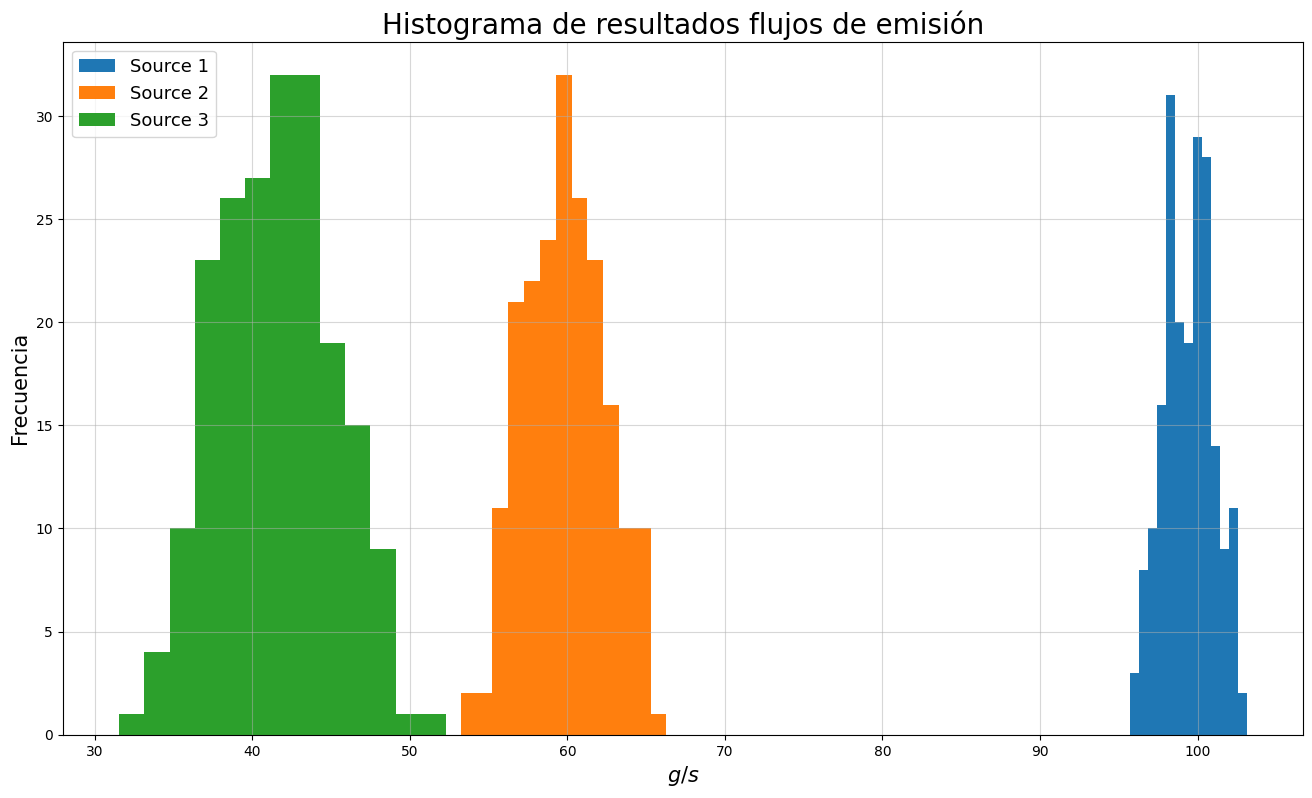

In [81]:
plt.figure(figsize=(16,9))

plt.hist(q1, bins = 13 , label = 'Source 1')
plt.hist(q2 , bins = 13, label = 'Source 2')
plt.hist(q3, bins = 13, label = 'Source 3')
plt.legend(loc = 'upper left', prop={'size': 13})
plt.grid(alpha = 0.5)

plt.title('Histograma de resultados flujos de emisión', fontsize = 20)
plt.xlabel('$g/s$', fontsize = 15)
plt.ylabel('Frecuencia', fontsize = 15)

plt.savefig('histogram_3sources.png')

In [78]:
print(np.mean(q1))
print(np.mean(q2))
print(np.mean(q3))

print(np.std(q1))
print(np.std(q2))
print(np.std(q3))

99.42122749790134
59.856964855178596
41.49970065916772
1.5569611063058713
2.520974255183257
3.6928431328063516
